In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import re
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [79]:
taobao_df = pd.read_csv('taobao.csv')

In [80]:
taobao_df.head()

,Unnamed: 0,adgroup_id,cate_id,campaign_id,advertiser_id,brand_id,price,user_id,time_stamp,pid,clk,cms_segid,cms_group_id,gender,age_level,shopping_level,occupation,new_user_class_level,date_time
0,0,63133,6406,83237,1,95471.0,170.0,658198,1494675187,430539_1007,0,35,4,2,4,3,0,2.0,2017-05-13 11:33:07
1,1,751393,6735,82613,764,245342.0,159.0,658198,1494281824,430539_1007,0,35,4,2,4,3,0,2.0,2017-05-08 22:17:04
2,2,478600,6735,134386,3962,416449.0,228.0,658198,1494293290,430539_1007,0,35,4,2,4,3,0,2.0,2017-05-09 01:28:10
3,3,624512,6300,246754,19314,353787.0,87.0,658198,1494320946,430539_1007,0,35,4,2,4,3,0,2.0,2017-05-09 09:09:06
4,4,659291,1665,114429,19314,353787.0,135.0,658198,1494668636,430539_1007,0,35,4,2,4,3,0,2.0,2017-05-13 09:43:56


In [81]:
taobao_df.shape

(25029435, 19)

In [82]:
taobao_df['date'] = pd.to_datetime(taobao_df['date_time']).dt.strftime('%m-%d-%Y')

In [83]:
taobao_df['date'].head()

0    05-13-2017
1    05-08-2017
2    05-09-2017
3    05-09-2017
4    05-13-2017
Name: date, dtype: object

In [84]:
taobao_sampled = taobao_df.groupby('date', group_keys=False).apply(lambda x: x.sample(frac=0.1))

In [85]:
taobao_sampled.shape

(2502944, 20)

In [86]:
(taobao_sampled['date'].value_counts()) / len(taobao_sampled) * 100

date
05-11-2017    12.722298
05-08-2017    12.685102
05-07-2017    12.681706
05-10-2017    12.643911
05-06-2017    12.357048
05-12-2017    12.300155
05-09-2017    12.282776
05-13-2017    10.659487
05-05-2017     1.667516
Name: count, dtype: float64

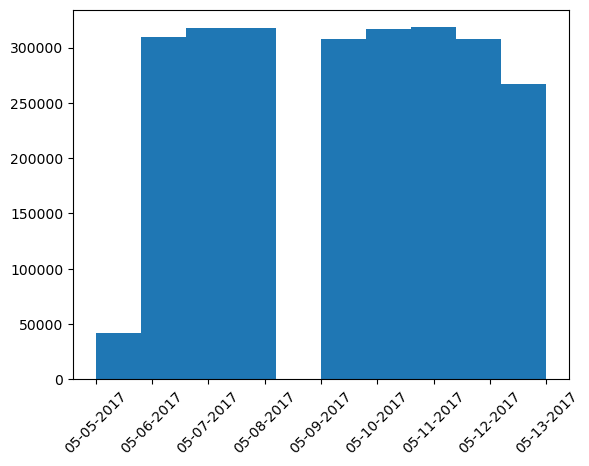

In [87]:
plt.hist(taobao_sampled['date'])
plt.xticks(rotation=45)
plt.show()

In [88]:
(taobao_sampled['clk'].value_counts()) / len(taobao_sampled) * 100

clk
0    94.858535
1     5.141465
Name: count, dtype: float64

The graph seems to have an visual error with the plot around 05-07-2017 because the distribution for all the dates are shown to be fine when calculated beforehand. The distribution of the clicks and non-clicks also seems to be within the expected range. So stratified sampling 1.0% the dataset seems to have worked perfectly, from 25 million data entries to a just 2.5 million entries.  

In [90]:
taobao_sampled.to_excel("taobao_sampled.csv")

ValueError: This sheet is too large! Your sheet size is: 2502944, 20 Max sheet size is: 1048576, 16384

In [ ]:
#sns.boxplot(taobao_sampled['price'])

In [ ]:
#ercentile25 = taobao_sampled['price'].quantile(0.05)
#ercentile75 = taobao_sampled['price'].quantile(0.95)
#qr = percentile75 - percentile25

# upper_limit = percentile25 + 1.5 * iqr
# lower_limit = percentile75 - 1.5 * iqr

# print(f"upper limit: {upper_limit}")
# print(f"upper limit: {lower_limit}")

In [ ]:
#taobao_sampled = taobao_sampled[(taobao_sampled['price'] >= lower_limit) & (taobao_sampled['price'] <= upper_limit)]

In [ ]:
#sns.boxplot(taobao_sampled['price'])

In [ ]:
#taobao_sampled.shape

In [ ]:
#split dates into days for categorical encoding/create dummies
#create dummies for gender and age_level (conceverting 1s, 2s to 0s, 1s)
#create dummies for shopping level 
#create dummies for occupation
#create dummies for new_user_class level
#figure out encoding function for high cardinality features
#double check of outliers in prices

In [ ]:
#since i'm checking if a user would click on an ad or not, its a supervised learning binary classification type of problem
#given its either a 'Yes' or a 'No' and all the entirety of the dataset is labeled already